In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from pywaffle import Waffle
import circlify

from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt import HRPOpt

c:\Users\jyin1\AppData\Local\Programs\Python\Python311\Lib\site-packages\pypfopt\hierarchical_portfolio.py:138: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.92269131 0.92269131 0.92269131 0.92269131 0.92269131 0.92269131
 0.92269131]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  w[first_cluster] *= alpha  # weight 1


Expected annual return: 18.8%
Annual volatility: 10.9%
Sharpe Ratio: 1.55
{'10Y Bond': 0.005504292045187562, '2Y Bond': 0.003411491426056471, 'Copper': 0.01516607698076126, 'Crude Oil': 0.013112389881139159, 'EUR/USD': 0.4538083195572509, 'GHYG': 0.022113392520257843, 'Iron Ore': 0.07917856362544536, 'NLR': 0.008082273378763768, 'SOXX': 0.004904701934608346, 'Soybean': 0.05132612181814323, 'USD/JPY': 0.3163501358208483, 'VFH': 0.004794864939568839, 'VTV': 0.00891171652872957, 'VWO': 0.013335659543239354}


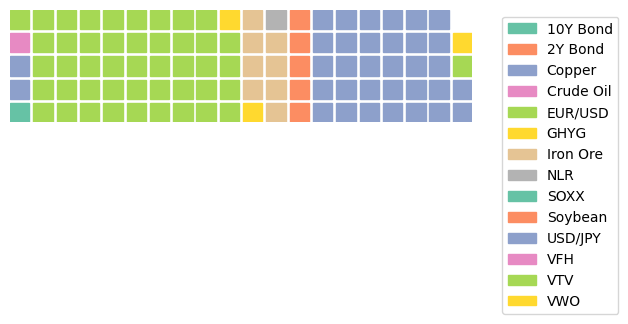

In [15]:

portfolio = pd.read_excel('all_data.xlsx')

# HRP Method
returns = portfolio.pct_change().dropna()
# mu = mean_historical_return(returns)
# S = CovarianceShrinkage(returns).ledoit_wolf()
hrp = HRPOpt(returns)
hrp_weights = hrp.optimize()
hrp.portfolio_performance(verbose=True)
print(dict(hrp_weights))

# Basic waffle
plt.figure(
    FigureClass=Waffle,
    rows=5,
    columns=20,
    values=hrp_weights,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1)},
)
plt.show()

In [18]:
weights = {'10Y Bond': 0.005504292045187562, 
            '2Y Bond': 0.003411491426056471, 
            'Copper': 0.01516607698076126, 
            'Crude Oil': 0.013112389881139159, 
            'EUR/USD': 0.4538083195572509, 
            'GHYG': 0.022113392520257843, 
            'Iron Ore': 0.07917856362544536, 
            'NLR': 0.008082273378763768, 
            'SOXX': 0.004904701934608346, 
            'Soybean': 0.05132612181814323, 
            'USD/JPY': 0.3163501358208483, 
            'VFH': 0.004794864939568839, 
            'VTV': 0.00891171652872957, 
            'VWO': 0.013335659543239354
}

tiered_weights = [{'id': 'Fixed Income', 'datum': 0.03102917599, 
                    'children' : [{
                                    'id':'10Y Bond', 'datum': 0.005504292045187562, 
                                    'id': '2Y Bond', 'datum': 0.003411491426056471, 
                                    'id': 'GHYG', 'datum': 0.022113392520257843
                                }],
                    'id': 'Commodities', 'datum': 0.1587831523, 
                    'children' : [{
                                    'id': 'Copper', 'datum': 0.01516607698076126, 
                                    'id': 'Crude Oil', 'datum': 0.013112389881139159, 
                                    'id': 'Iron Ore', 'datum': 0.07917856362544536, 
                                    'id': 'Soybeans', 'datum': 0.05132612181814323
                                }],
                    'id': 'Foreign Exchange', 'datum': 0.7701584554, 
                    'children' : [{
                                    'id': 'EUR/USD', 'datum': 0.4538083195572509, 
                                    'id': 'USD/JPY', 'datum': 0.3163501358208483
                                }],
                    'id': 'Equities', 'datum': 0.04002921632, 
                    'children' : [{
                                    'id': 'NLR', 'datum': 0.008082273378763768, 
                                    'id': 'SOXX', 'datum': 0.004904701934608346, 
                                    'id': 'VFH', 'datum': 0.004794864939568839, 
                                    'id': 'VTV', 'datum': 0.00891171652872957, 
                                    'id': 'VWO', 'datum': 0.013335659543239354
                                }]
}]

In [19]:
# create circle plot

circles = circlify.circlify(
    tiered_weights,
    show_enclosure=False,
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

# configure data plot
fig, ax = plt.subplots(figsize=(14, 14))
ax.set_title('Portfolio Weightings')
ax.axis('off')
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

for circle in circles:
    if circle.level != 2:
        continue
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.5,
                    linewidth=2, color="lightblue"))

# Print circle and labels for the highest level:
for circle in circles:
    if circle.level != 3:
        continue
    x, y, r = circle
    label = circle.ex["id"]
    ax.add_patch(plt.Circle((x, y), r, alpha=0.5,
                    linewidth=2, color="#69b3a2"))
    plt.annotate(label, (x, y), ha='center', color="white")

# Print labels for the continents
for circle in circles:
    if circle.level != 2:
        continue
    x, y, r = circle
    label = circle.ex["id"]
    plt.annotate(label, (x, y), va='center', ha='center', bbox=dict(
        facecolor='white', edgecolor='black', boxstyle='round', pad=.5))

KeyError: 'datum'